In [1]:
import pandas as pd
import seaborn as sns
import re

train_path = './preprocessed_training_set/train_df.csv'
test_path = './preprocessed_training_set/test_df.csv'

In /home/aloy/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/aloy/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/aloy/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/aloy/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/aloy/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_c

In [35]:
test_df = pd.read_csv(test_path)
train_df = pd.read_csv(train_path)
train_df.shape

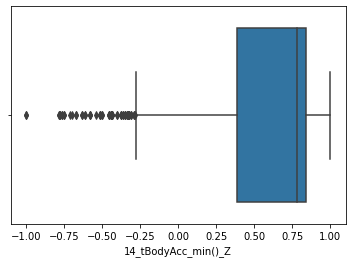

In [57]:
#Removing outliers using the interquartile range
#Prepare training dataset
train_df = pd.read_csv(train_path)
new_df = train_df #copy dataframe for editing
for cols in train_df.columns: #travers each feature column
    Q3 = train_df[cols].quantile(0.75)
    Q1 = train_df[cols].quantile(0.25)
    outlier_factor = 20
    IQR = Q3-Q1
    upperlimit = Q3 + outlier_factor*(IQR)
    lowerlimit = Q1 - outlier_factor*(IQR)
    #remove rows that dont satisfy upper and lower limits
    new_df = new_df[new_df[cols] > lowerlimit]
    new_df = new_df[new_df[cols] < upperlimit]
#save csv
new_df.to_csv('./preprocessed_training_set/train_df_O.csv',index=False)

(6536, 563)

In [78]:
#Balance the dataset using SMOTE
from scipy.io import arff #To read weka saved files
#Prepare training dataset
path = './preprocessed_training_set/train_df_O_T.csv.arff'
data = arff.loadarff(path)
df = pd.DataFrame(data[0])

int(df['LABELS'][0].decode("utf-8")) #labels are saved in bytes, convert to int
df['LABELS'] = df['LABELS'].apply(lambda x : int(x.decode("utf-8")) )
columns = df.drop('LABELS',axis=1).columns

#Applying SMOTE
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X,y = oversample.fit_resample(df.drop('LABELS',axis=1),df['LABELS'])
new_df = pd.DataFrame(X,columns=columns)
new_label = pd.DataFrame(y,columns=['LABELS'])
new_df = pd.concat([new_df,new_label],axis=1) 
#save csv
new_df.to_csv('./preprocessed_training_set/train_df_O_T_Smote.csv',index=False)

In [117]:
#Prepare train and test datasets
from scipy.io import arff #library to read weka files

#Read in preprocessed training dataset (without PCA)
train_df = pd.read_csv('./preprocessed_training_set/train_df_O_T_Smote.csv')

#Read in preprocessed testing dataset (without PCA)
path = './preprocessed_training_set/test_df_log.csv.arff'
data = arff.loadarff(path)
test_df = pd.DataFrame(data[0])
test_df['LABELS'] = test_df['LABELS'].apply(lambda x : int(x.decode("utf-8")) )

#PCA process
from sklearn.decomposition import PCA
pca = PCA(n_components='mle') #search for optimal components using minka's MLE

x = train_df.drop(['LABELS'],axis=1) #train features
y = train_df['LABELS'] #train label
pca.fit(x)
new_x = pca.transform(x)

#rename principal components
new_feature_col = ['PCA_feature_{}'.format(i) for i in range(new_x.shape[1])]
new_x = pd.DataFrame(new_x,columns=new_feature_col)
trnew_df = pd.concat([new_x,y],axis=1) #combine the new component features and labels
#Save csv
trnew_df.to_csv('./preprocessed_training_set/train_df_O_T_Smote_PCA.csv',index=False)

x = test_df.drop(['LABELS'],axis=1) #test features
y = test_df['LABELS'] #test label
new_x = pca.transform(x)

#rename principal components
new_feature_col = ['PCA_feature_{}'.format(i) for i in range(new_x.shape[1])]
new_x = pd.DataFrame(new_x,columns=new_feature_col)
new_df = pd.concat([new_x,y],axis=1) #combine the new component features and labels
#Save csv
new_df.to_csv('./preprocessed_training_set/test_df_log_PCA.csv',index=False)


